# Predict- Decision Trees
A decision tree takes a set of data and it splits that data continuously until it has a predicted outcome. How many times have you heard someone say, "If I only had a crystal ball, I could predict the future"? Well, we're going to do just that, and walk you through the process step by step so you can grasp exactly how to go about it. Now brick and mortar retailers in the US do an estimated 4 trillion in sales each year. That number might be surprising given the power of e-commerce these days, but old school retail is still a significant economic engine. To that point, in this chapter, we're going to help a retailer determine where their next store and expansion of the retail business should be located. And we're going to do so using, you guessed it, prediction. What our prediction algorithm is going to do is assess the ability for different predictors to influence the outcome. In the case of our retailer, the potential predictors that we have available to us in our data set are weather, the radius of complimentary establishments, the population, the number of cars that drive by each store, and the unemployment rate for the store's geographic location. These predictors can help us to understand the conditions necessary for our retailer to make a safe bet on their next location. We just have to figure out which ones matter. So, let's get started with our prediction analysis. These predictors can help us to understand the conditions necessary for our retailer to make a safe bet on their next location.

In [ ]:
!pip install scikit-learn


In [ ]:
 !pip install pydotplus

In [21]:
# Establish the functionality for our assessment by bringing in the right packages
# Make sure to install these prior to mounting the packages 
# i.e. $ pip install pydotplus
# & visit http://www.graphviz.org/Download_macos.php

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import pydotplus as pdot
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split  # Update import statement

# from sklearn.cross_validation import train_test_split

%matplotlib inline

In [24]:
# Connect to the data source
myPredictionData = pd.read_csv("C:/Users/merve/Desktop/Ex_Files_Data_Science_of_Marketing/Exercise_Files/04_03/prediction-py.csv")

In [25]:
# Show column names for reference
myPredictionData.columns

Index(['sales', 'sales_classification', 'capita', 'drive-by-traffic',
       'complimentary-establishments', 'competition', 'weather',
       'unemployment-rate', 'var1', 'var2', 'var3'],
      dtype='object')

In [26]:
# Set up our cross validation function

feature_cols = ['capita', 'competition', 'weather', 'var1', 'var2', 'var3' ]

train_X, test_X,  \
train_y, test_y = train_test_split( myPredictionData[feature_cols],
                                    myPredictionData['sales_classification'])

In [27]:
# Set up our depth list for our tree branches

depths_list = [2,3,4,5,6,7,8]

for depth in depths_list:
    clf_tree = DecisionTreeClassifier( max_depth = depth )
    clf_tree.fit( train_X, train_y )

In [33]:
# Specify the number of branches for our tree
clf_tree = DecisionTreeClassifier(max_depth=2)

In [34]:
# Fit our training data to the x and to the y
clf_tree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=2)

In [35]:
# Apply our test data to our model 
tree_predict = clf_tree.predict(test_X)

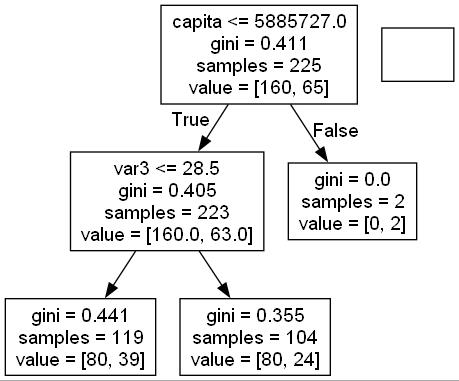

In [36]:
# Visualize our tree
export_graphviz( clf_tree,
                out_file = "C:/Users/merve/Desktop/Ex_Files_Data_Science_of_Marketing/Exercise_Files/04_03/model_tree.odt",
                feature_names = train_X.columns )
model_tree_graph = pdot.graphviz.graph_from_dot_file( 'model_tree.odt' )
model_tree_graph.write_jpg( 'model_tree.jpg' )

from IPython.display import Image
Image(filename='model_tree.jpg')

We can see have a tree here that looks at overall capita, and looks at our sales output, assigns that, anything less than or equal to this capita number, generates the sales classification that we're trying to drive, and then it does another branch here and looks at specifically, at the next level of capita and helps us to really identify what our prediction is.

This approach will allow for us to run multiple tests over time, to gain further confidence that our prediction accurate.